# REAL1-CG.3135: Real Estate Data Science

## Class 13
### Introduction to Bayesian Inference

>"I can live with doubt and uncertainty... I have approximate answers and possible beliefs and different degrees of certainty about different things, and I'm not absolutely sure of anything..."

>> Richard Feynman

In [1]:
# Load the libraries.

%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
import pymc3 as pm
import theano
from mpl_toolkits.mplot3d import Axes3D
import fix_yahoo_finance as yf
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

## Overview

In this lecture, we will discuss the distinction between the frequentist approach to statistical learning and the Bayesian approach.  You should have already watched the videos on:

1. Conditional Probability
2. An example of Bayes Theorem
3. The "Monte Hall" Problem (which is another example of conditional probability)

Bayes theorem is typically taught in data analytics courses, such as this one, using the example in the video.  It is presented as a simple exercise at calculating "inverse probability".  The topic of Bayesian analysis is then oddly dropped, and students are asked to refocus on the frequentist approach (using the tools we already discussed).  But having watched the video (and perhaps having solved the problem presented in the video), you have already conducted Bayesian analysis.    

This purpose of this lecture is to introduce you to the methods by which we can apply Bayes theorem in a meaningful way to real-world data.  To do so, we will address the ingredients of Bayesian inference using a variety of examples.

1. Probabilistically assess whether a coin is balanced (or fair) by combining our prior beliefs with experimental data.  (If you understand this simple example, then you understand the core of the Bayesian approach to inference.)  
2. Use two popular Markov Chain Monte Carlo (MCMC) simulation methods, the Gibbs and the Metropolis-Hastings algorithms.  (The focus here will what they do rather than on how they work.  In particular, you will see that these MCMC algorithms are able to simulate probabilty distributions extraordinarily well.) 
3. Simulate the posterior probabilty distributions of $\alpha$ and $\beta$ from the CAPM.  (Here you will see the strength of the Bayesian approach to inference, in particular the ease of hypothesis testing from a Bayesian perspective.)  

At the end of lecture, my goal is for you to:

1. Understand the Bayesian approach to inference.
2. Understand the use of MCMC algorithms as simulation tools of the posterior probability distribution (given data and prior beliefs).
3. To see how simple hypothesis testing really is (and why it is so difficult to explain from a frequentist perspective).

## The Buzz

> "Now Bayesian statistics are rippling through everything from physics to cancer research, ecology to psychology. Enthusiasts say they are allowing scientists to solve problems that would have been considered impossible just 20 years ago. And lately, they have been thrust into an intense debate over the reliability of research results."  

> "The essence of the frequentist technique is to apply probability to data. If you suspect your friend has a weighted [unfair] coin, for example, and you observe that it came up heads nine times out of 10, a frequentist would calculate the probability of getting such a result with an unweighted [fair] coin. The answer (about 1 percent) is not a direct measure of the probability that the coin is weighted [unfair]; it’s a measure of how improbable the nine-in-10 result is — a piece of information that can be useful in investigating your suspicion."

> "By contrast, Bayesian calculations go straight for the probability of the hypothesis, factoring in not just the data from the coin-toss experiment but any other relevant information — including whether you have previously seen your friend use a weighted [unfair] coin."

>> [The New York Times, Sept. 29, 2014](http://www.nytimes.com/2014/09/30/science/the-odds-continually-updated.html)

> "My training as an econometrician, perhaps like many, lay in the canonical texts of Greene (multiple editions), Hamilton (1994), and Campbell et al. (1997)... But these canonical texts have little to no discussion of Bayesian methods of estimation and inference... The treatment does not include the standard MCMC methods used today, Gibbs sampling, or Metropolis-Hastings. Nor is there a discussion of the need for burn-in or the distinction between Bayesian credible intervals and classical confidence intervals."

> "With this backdrop, one might suppose that Bayesian methods have little role to play in the practice of empirical analysis, and particularly not real estate. As Sharon Bertsch McGrayne richly explores in The Theory that Would Not Die, however, the Bayesian approach to estimation and inference has survived every intellectual objection, both
philosophical and utilitarian, for nearly two centuries."

> "The now-familiar Bayes-Price-Laplace formula states that the posterior probability distribution over a parameter of interest is proportional to its prior probability distribution, the researcher’s degree of belief, times the likelihood function describing the data. On paper, this is a logically-consistent approach to learning and hypothesis
testing. But mathematically, closed-form solutions are limited, and only recent advances in computational power have made it tractable for general application."

> "The physicist Richard Feynman once said that, ‘I can live with doubt and uncertainty... I have approximate answers and possible beliefs and different degrees of certainty about different things, and I’m not absolutely sure of anything...’ Arguably, this is not a statement that sees probability as the outcome of history of coin flips. Economics and finance researchers study constrained decision-making under uncertainty. Real estate development and investing, given its vast array of risk, is a case study for living with doubt and uncertainty. For every real estate success, there may be a large corpus of failure, where probability as the outcome of a history provides little guidance. As a result, a Bayesian approach, either philosophical or practical, might be a tonic."

>> Savage (2019), [Review](file:///Users/timothysavage/Downloads/The%20Theory%20That%20Would%20Not%20Die.pdf) of *The Theory that Would Not Die: How Bayes’ Rule Cracked the Enigma Code, Hunted Down Russian Submarines, and Emerged Triumphant from Two Centuries of Controversy*

## Why?

1. General increase in the demand for data analytics generally and real estate specifically.
    * Sparse data that is updated and expanded with time.
2. Clinical trials.
3. Survey research.
4. Data-driven policy evaluation in both the public and private sectors.
5. Computational speed and the advance of open source statistical learning environments, such as R and Python.
6. Limitations of the frequentist approach to inference that are now hindering the advance of data analytics in decision- and policy-making.  In particular, the implicit reliance on **non-existent** repeated samples and fixed parameter values that underlies the frequentist approach to data science.
    > Were this procedure to be *repeated on numerous samples*, the fraction of calculated confidence intervals (which would differ for each sample) that encompass the true population parameter would tend toward 95%.

## A Brief History

Mathematicians Laplace, Legendre, de Morgan, and Gauss (1700’s through 1850’s) lay the foundations of probability and statistics as a formal branch of mathematics.  While an essay by the Rev. Thomas Bayes is published after his death, it would require Laplace to reformulate a mathematically-coherent version of the law of inverse probability.  The law of inverse probability is essentially a statement about inductive reasoning that we do all the time.  

Statisticians Fisher, Neyman, and the Pearsons (father and son) develop the classical interpretation of statistical inference (early 1900’s).  Fisher is personally hostile to Bayesian inference, calling it an “impenetrable jungle”.  In the early 1960's, interest in approach was re-ignited by scholars such Jeffreys, Savage, de Finetti, and Lindley.  This was partially driven by the Markov Chain Monte Carlo (MCMC) simulation approach developed in statistical physics by Metropolis.  (We will implement a version of his method below.)

With the development of modern computational speed, it is easy to implement MCMC, which has greatly expanded the scope of Bayesian inference.  

## Distinctions

The frequentist approach to inference treats the unknown parameters of interest, such as the $\beta$’s in the linear model, as constants to be statistically estimated using data.  Using this approach, we evaluate hypotheses using confidence intervals as if we had “repeated samples”.

For example, for CAPM, we statistically estimated $\alpha$ and $\beta$ using the principle of least squares and obtained point estimates of their values.  Using a 95% confidence interval, we tested the hypothesis that $\beta=$1 by asking whether a 95% confidence interval includes 1.  But the concept of a 95% confidence interval is derived from the idea of so-called "repeated samples".  In repeated samples, a 95% confidence interval will cover the true, fixed parameter value 95% of the time.  In the typical applied setting, however, the idea of repeated samples is meaningless.  You have one data set.  Moreover, there is no reason to believe that the unknown parameters of interest are constant (or fixed in repeated samples even if you had access to them).  Moreover, it is unclear how to incorporate prior information. 

The Bayesian approach to inference treats the unknown parameters of interest $probabilistically$.  That is, rather than view them as fixed constants, the Bayesian approach views them as probability distribution functions, from which we can calculate certain things, such as a mean and a standard deviation.  Hypothesis testing can then address the more meaningful questions such as, in CAPM, what is the probability that $\alpha \ge 0$ or $\beta \le 1$?  Probabilistic answers to these questions could actually drive meaningful decision making.   

In addition, the Bayesian approach incorporates a data scientist's prior beliefs about the unknown parameters of interest.  Those beliefs can be vague or  specific, but they too are expressed in term of probability distribution functions.

## Three Important Bayesian Terms

1. **Prior probability**: a probabilistic expression of a data scientist's belief regarding the unknown parameters of interest prior to the observation of any data (for example, beliefs about the $\beta$'s from the linear model).

2. **Likelihood**: a probabilistic expression regarding the observed data.

3. **Posterior probability**: a probabilistic expression of a data scientist’s updated beliefs based on observed data.

It is important for you to understand that all of these are expressed explicitly in terms of **probabilty distribution functions**.

Conceptually, the approach is straightforward.

1.  Express your **prior beliefs** about the unknown parameters of interest in terms of a probability distribution.

2.  Collect data and express the data in terms of a probability distribution, **called the likelihood**.

3.  Update your beliefs about the unknown parameters of interest by **combining 1 and 2**.

This process gives rise to the general Bayesian statement: 

* Posterior $\propto$ Likelihood $\times$ Prior

## Digression on Probability Distributions

### Uniform Distribution

A prior distribution that expresses a data scientist's vague beliefs.

(0, 0.8)

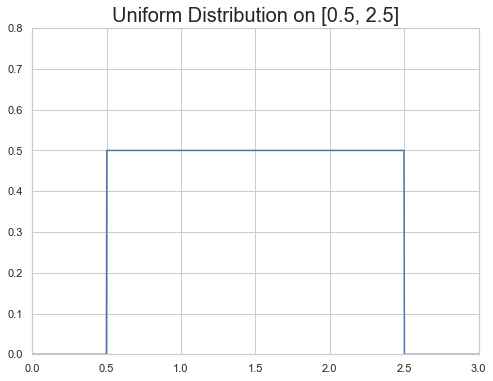

In [2]:
plt.figure(figsize = (8, 6))
x = np.linspace(0, 3, 1000)
a = 0.5
b = 2.5
l = b - a
plt.title('Uniform Distribution on [0.5, 2.5]', fontsize = 20)
plt.plot(x, stats.uniform.pdf(x, a, l))
plt.xlim([0, 3])
plt.ylim([0, 0.8])

### Binomial distribution

The data generating process that describes number of heads in a series of random coin flips.  

(400, 600)

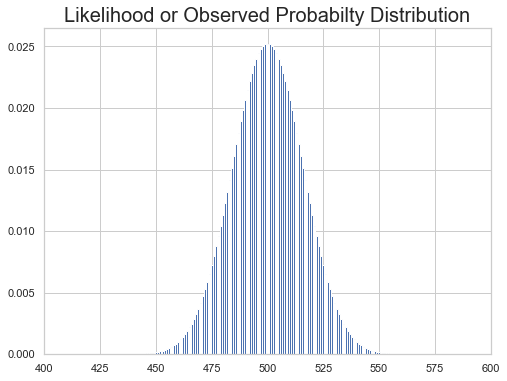

In [3]:
# Flip a fair (or balanced) coin a large number of times

plt.figure(figsize = (8, 6))
r = range(1, 1000)
plt.title('Likelihood or Observed Probabilty Distribution', fontsize = 20)
plt.bar(r, stats.binom.pmf(r, p=0.5, n=1000))
plt.xlim([400, 600])

## Concrete Distinctions

### Frequentist v. Bayesian

* **Frequentist**: Probability is observed as the result of an “infinite” series of trials.  Data are a random sample from a fixed DGP, and the parameters are fixed.

* **Bayesian**: Probability is the observer’s degree of belief.  Data are observed and therefore fixed by the sample generated, and the parameters are described probabilistically.

* **Frequentist**: Point estimates and standard errors.  95% confidence intervals that cover the true parameter value in “19 out of 20 repeated samples.”  Classical hypothesis testing using rejection regions based on confidence intervals.

* **Bayesian**: Summary statistics from posterior distribution, such as averages and percentiles.  95% credible intervals. Probability statements regarding hypotheses: $P(heads) \ge 0.5$.

# Example 1: Is a Coin Balanced?

## Frequentist Approach

1. State a null hypothesis that the coin is balanced. H$_0$: Pr(heads) = 0.5. 

2. Establish a rejection region for the null hypothesis.

3. Obtain data by flipping a coin 10 times.

4. Calculate the sample proportion as $\hat p$ = (number of heads) / 10.  Calculate the t-stat for this statistic, $\hat p \big/ \sqrt{\frac{\hat p (1 - \hat p)}{10}}$.

5. If the outcome were 5 heads, a data scientist would fail to reject the null because the t-stat would be zero.  

This approach does not allow for a data scientist to express her prior beliefs regarding the nature of coin, in particular whether she believes it is balanced.  Moreover, once she make a decision about whether to reject or fail to reject $H_0$, what could she do with additional data?  

## Bayesian Approach

1. Express your prior beliefs ("priors") in terms of a probability distribution function about the coin itself.  In this example, such priors may be a uniform probability distribution function ("vague" or "uninformed" priors).  Alternatively, your beliefs may be that the coin is not balanced because tails is more likely than heads or heads is more likely than tails because you have prior information.  Alternatively, you may express a high degree of belief that the coin is balanced (again expressed a probability distribution function).
2. Obtain data by flipping a coin 10 times.  (Recall that we can express the DGP of coin flipping as a binomial distribution, which we call the likelihood.)
3. Based on the observed outcomes, generate a posterior probability distribution function about the nature of the coin by combining your priors with the likelihood.  Because we have a probability distribution function, we can calculate many different things, such as an average, a standard deviation, and whether Pr(heads) $\ge$ 0.5.

Let's do this in R.  

(NB: This example works well because of the so-called "conjugate prior".  I don't want to dwell on this.  I want you to see a visualization that is aimed show you how a prior interacts with experimental data to affect a posterior.  We break away from the need of conjugacy through the use of MCMC simulation.)

# R Visualization

# A Criticism and The Response

The standard criticism of the Bayesian approach to inference is that a data scientist's prior beliefs are subjective.  

This is true.  But the prior beliefs are openly and explicitly stated in probabilistic terms.  In other words, the priors are an overt and clear statement regarding model assumptions.  Moreover, the use of prior beliefs is a systematic way to incorporate prior "domain knowledge" on a subject (that is, expertise).  Finally, it can be shown that the formulation of the posterior probability distribution function is dominated by the observed data, not by the the data scietist's prior beliefs or expertise.

Unlike the frequestist approach, the Bayesian approach provides a rigorous way to make probability statements about the real quantities of interest for a data scientist.  It does not view these real quantities as fixed in repeated samples, an assumption that lies at the heart of frequentist approach.  The Bayesian approach also permits the ability to update these probability statements as new infromation is received.  This is a form of learning.  

Finally, as noted in the New York Times article, the Bayesian approach is proving successful when applied in a variety of different contexts.  (And its use in data science is growing considerably with computational power and open-source statistical computing.)

# What Do (We) Bayesians Need for Inference?

The formal estimation of a Bayesian model is the most difficult undertaking in Bayesian analysis.  The simple coin flipping example was instructive, but it relies on conjugacy, which is a limitation.  

The modern Bayesian approach is to summarize the $entire$ posterior probability distribution, which is necessary to make probabilistic statements about real quantities of interest for data scientists.  (The Bayes calculation in the video example produces a single value.  In truth, modern Bayesian inference relies on a probability distribution.)  

This undertaking is achieved through Markov Chain Monte Carlo (MCMC) simulation, and I will now show two popular MCMC algorithms using the bivariate normal distribution.

## The Return of the Bivariate Normal

Recall that we have looked at the bivariate normal distribution.  It was used to generate the first scatterplot for this class.  We are going to use this distribution to implement the Gibbs MCMC algorithm.  

We will see even if we have a starting value for our MCMC process that is far away from the distribution that we are simulating, we are able to converge rapidly through a process called "burn in".  Once our MCMC sequence has burned in, it will sample the distribution in a manner that is proportional to the distribution being simulated.  

#### Notes
* Recall the 3D image for the bivariate normal.  Keep this image in your mind.  
* The bluer the region, the less likely is it.  The redder the region, the more likely it is.
* Recall the contour slices show what we will are simulating.
* The darker the ring, the more likely it the area within it.

Text(0.5, 0.92, 'Bivariate Normal, $\\rho = 0.5$')

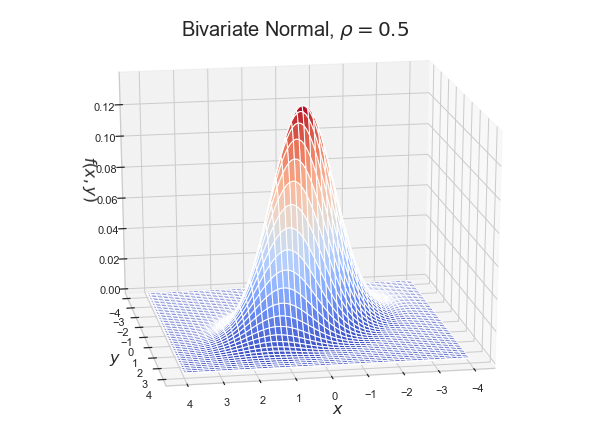

In [4]:
import matplotlib.cm as cm

x, y = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)
z = np.mat(np.zeros(2))
p = np.zeros(np.shape(x))
R = np.matrix([[1, 0.5],[0.5, 1]])
Rinv = linalg.inv(R)

for i in range(len(x)):
    for j in range(len(y)):
        z[0, 0] = x[i, j]
        z[0, 1] = y[i, j]
        p[i, j] = (1.0 / (2 * np.pi) * np.sqrt(linalg.det(R))) * np.exp(-(z * Rinv *z.T) / 2)

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='#AD5300')
ax.plot_surface(x, y, p, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='black')
ax.view_init(20, 80) # rotation through 20, 40, 60, 80
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_zlabel(r'$f(x, y)$', fontsize = 16)
ax.set_title(r'Bivariate Normal, $\rho = 0.5$', fontsize = 20)

Text(0.5, 1.0, 'Contour Slices of Bivariate Normal, $\\rho = 0.5$')

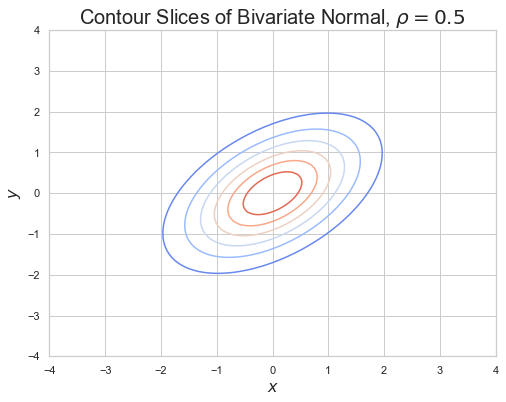

In [5]:
fig = plt.figure(figsize = (8, 6))
ax = fig.gca()
ax.contour(x, y, p, cmap=cm.coolwarm)  
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_title(r'Contour Slices of Bivariate Normal, $\rho = 0.5$', fontsize = 20)

## MCMC Simulation Using The Gibbs Algorithm 

* The Gibbs algorithm is a Markov chain Monte Carlo (MCMC) method to simulate a sequence of observations, as an approximation, when direct sampling is difficult. 
* The sequence geneated by this method can be used to approximate through historgrams:
    1. a joint distribution
    2. a marginal distribution of one of the variables
    3. an integral to be used generate averages

* It is a simple method that makes use of random numbers that generates a Markov chain. 
* We need time for the Markov chain to converge, referred to as the "Burn In".  
* This is Gibbs algorithm to simulate the contour slices of a bivariate normal with $\rho = 0.5$.
* Start the MCMC chain at an arbitrary starting value (-10, -10).
* Our results are not dependent on this artibrary starting value.
* In the code below, mc is the number of mcmc replications.
* start is the random starting point, (start, start).

In [6]:
mc = 10000 
start = -10

x = np.zeros(mc)
y = np.zeros(mc)  
x[0], y[0] = start, start

for i in range(2, mc): 
    x[i] = np.random.normal(loc = 0.5 * y[i-1], scale = np.sqrt(1 - 0.5 * 0.5), size=1) 
    y[i] = np.random.normal(loc = 0.5 * x[i], scale = np.sqrt(1- 0.5 * 0.5), size=1)

#### Notes
* We start the MCMC chain at an arbitrary point and follow its progression by connecting all the simulated points with a line.
* We want to see the simulated point "build up" throughout the support of the bivariate normal.

Text(0.5, 1.0, 'First 25 Iterations of Gibbs Algorithm')

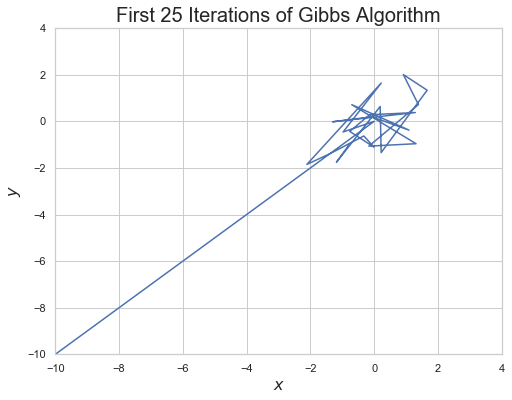

In [7]:
plt.figure(figsize = (8, 6))
plt.plot(x[0:24], y[0:24], 'b')
plt.xlim(-10,4)
plt.ylim(-10,4)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'First 25 Iterations of Gibbs Algorithm', fontsize = 20)

Text(0.5, 1.0, 'First 50 Iterations of Gibbs Algorithm')

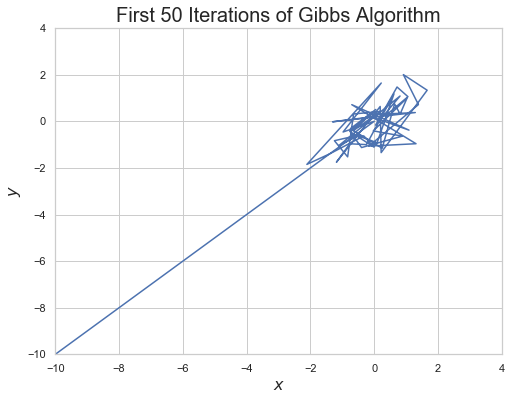

In [8]:
plt.figure(figsize = (8, 6))
plt.plot(x[0:49], y[0:49], 'b')
plt.xlim(-10,4)
plt.ylim(-10,4)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'First 50 Iterations of Gibbs Algorithm', fontsize = 20)

Text(0.5, 1.0, 'First 500 Iterations of Gibbs Algorithm')

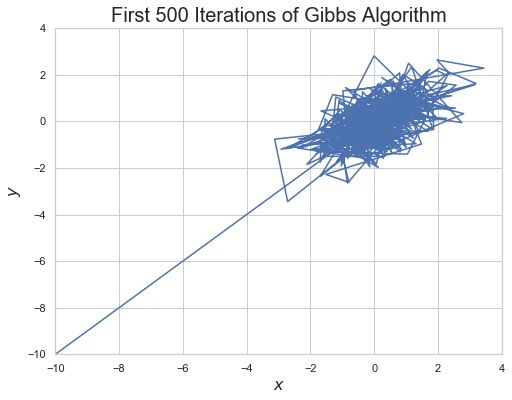

In [9]:
plt.figure(figsize = (8, 6))
plt.plot(x[0:499], y[0:499], 'b')
plt.xlim(-10,4)
plt.ylim(-10,4)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'First 500 Iterations of Gibbs Algorithm', fontsize = 20)

Text(0.5, 1.0, 'First 1,000 Iterations of Gibbs Algorithm')

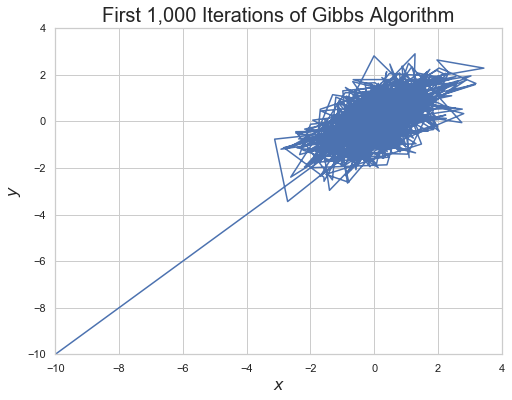

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(x[0:999], y[0:999], 'b')
plt.xlim(-10,4)
plt.ylim(-10,4)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'First 1,000 Iterations of Gibbs Algorithm', fontsize = 20)

#### Notes

* Treat the first 500 MCMC replications as the burn in and discard them.
* Generate a scatterplot of the remaining replications.
* Keeping in mind the bivariate normal, notice what is important in these MCMC replications.
    1. Their coverage is dense where the bivariate normal is most probable.
    2. It is sparse where the bivariate normal is the least probable.
* This is the the key to simulating a distribution function using MCMC.

Text(0.5, 1.0, 'Scatterplot of Gibbs Algorithm After Burn-In: Joint Distribution')

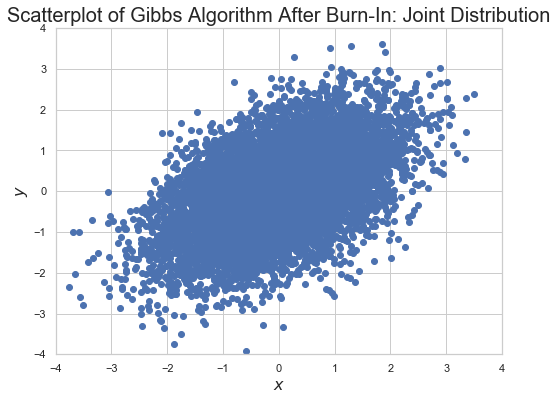

In [11]:
plt.figure(figsize = (8, 6))
plt.scatter(x[499:9999], y[499:9999], c='b')
plt.xlim(-4, 4)
plt.ylim(-4 ,4)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'Scatterplot of Gibbs Algorithm After Burn-In: Joint Distribution', fontsize = 20)

#### Notes

* Having simulated the bivariate normal with the Gibbs algorithm, we can examine to key aspects discussed above. # Calculate the average posterior together with 95% credible interval.
* We have basically recreated the univariate normal with mean zero and variance one.

The average is 0.003332
The 2.5 and 97.5 percentiles are -1.978976 and 1.951672


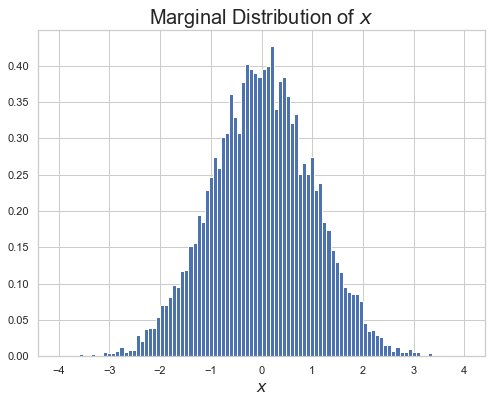

In [12]:
plt.figure(figsize = (8, 6))
plt.hist(x[499:9999], bins=100, range=(-4, 4), normed=True, color='b')
plt.xlabel(r'$x$', fontsize = 16)
plt.title(r'Marginal Distribution of $x$', fontsize = 20)

mean = x[499:9999].mean()
p2 = np.percentile(x[499:9999], 2.5)
p97 = np.percentile(x[499:9999], 97.5)
print("The average is %f" % mean)
print("The 2.5 and 97.5 percentiles are %f and %f" % (p2, p97))

The average is 0.002317
The 2.5 and 97.5 percentiles are -1.974196 and 1.983998


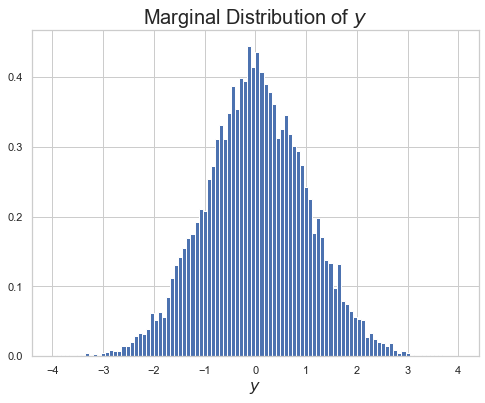

In [13]:
plt.figure(figsize = (8, 6))
plt.hist(y[499:9999], bins=100, range=(-4, 4), normed=True, color='b')
plt.xlabel(r'$y$', fontsize = 16)
plt.title(r'Marginal Distribution of $y$', fontsize = 20)

mean = y[499:9999].mean()
p2, p97 = np.percentile(y[499:9999], 2.5), np.percentile(y[499:9999], 97.5)
print("The average is %f" % mean)
print("The 2.5 and 97.5 percentiles are %f and %f" % (p2, p97))

## MCMC Simulation Using the Metropolis-Hastings Algorithm

#### Notes
* Metropolis Hasting is another MCMC algorithm that is useful.  Focus on what is occuring rather than the underlying code.
* One parameter of interest for the bivariate normal distribution is $\rho$, the correlation coefficient.  
* We are going to use the Metropolis-Hasting MCMC algorithm to simulate the posterior distribution of $\rho$ and to conduct Bayesian hypothesis testing.

* The posterior density of $\rho$ is:

$f(\rho | x, y) = (1 - \rho^2)^{-(N + 3)/2} \exp \left\{-\frac{1}{2(1 - \rho^2)} [\sum x_i^2 + \sum y_i^2 - 2 \rho \sum x_i y_i] \right\}$

$\log f(\rho | x, y) = -\frac {N + 3}{2} \log(1 - \rho^2) - \left\{\frac{1}{2(1 - \rho^2)} [\sum x_i^2 + \sum y_i^2 - 2 \rho \sum x_i y_i] \right\}$

* Using Metropolis Hasting algorithm, sample from (log) posterior of $\rho$ using the bivariate normal with mean zero, variance 1, and $\rho = 0.5$.
* ss is the sample size of the observed data
* draws is the number of MCMC draws
* Plot the first 50 MCMC Replications starting at $\rho = 0$.
* Again we want to see this MCMC algorithm burn in, converging to a value around $\rho = 0.5$ and stay in that region.

In [14]:
ss = 1000 
mean = [0,0]
random.seed(11192018)
R = np.matrix([[1, 0.5],[0.5, 1]])

draws = 10000 
corr = np.zeros(draws) # Initialize vector containing draws
acctot = 0 # A counter for accepted MCMC draws
adj = (ss + 3.0) / 2.0 # Sample size adjustment in the log posterior of rho

x, y = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

# Commence MH algorithm at 0
for i in range(1, draws):
    acc = 1 # Assume acceptible draw
    corr[i] = corr[i - 1] + np.random.uniform(-.07, .07, 1) # Add symmetric random variable 
    
    if abs(corr[i]) > 1: 
        corr[i] = corr[i-1] # Don't change 
    
    # Evaluation of current and prior draw
    a = -adj * np.log(1 - corr[i] ** 2) - 0.5 * (np.sum(x ** 2) - 2.0 * corr[i] * np.sum(x * y) 
                                                 + np.sum(y ** 2)) / (1 - corr[i] ** 2)
    b = -adj * np.log(1 - corr[i-1] ** 2) - 0.5 * (np.sum(x ** 2) - 2.0 * corr[i-1] * np.sum(x * y) 
                                                   + np.sum(y ** 2)) / (1 - corr[i-1] ** 2)
                
    if (a - b) < np.log(np.random.uniform(0, 1, 1)): # Metropolis Hastings criterion for rejection
        acc = 0 # Reject
        corr[i] = corr[i-1] # Don't change
        
    acctot += acc

Text(0.5, 0, 'Draw')

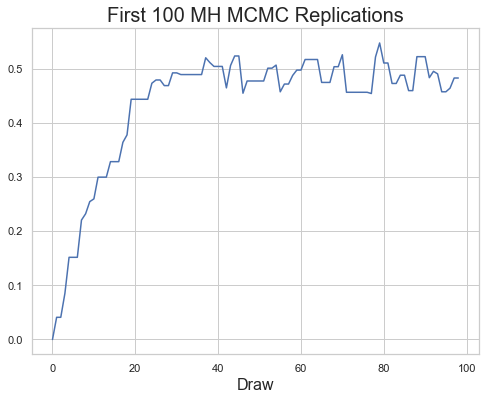

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(corr[0:99], c='b')
plt.title('First 100 MH MCMC Replications', fontsize = 20)
plt.xlabel('Draw', fontsize = 16)

Text(0.5, 0, 'Replication')

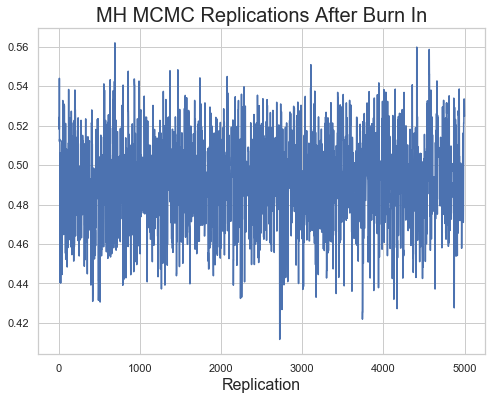

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(corr[4999:9999], c='b')
plt.title('MH MCMC Replications After Burn In', fontsize = 20)
plt.xlabel('Replication', fontsize = 16)

(0.4, 0.6)

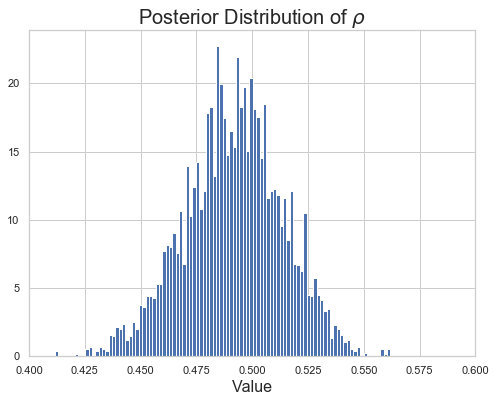

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(corr[4999:9999], bins=100, normed=True, color='b')
plt.title(r'Posterior Distribution of $\rho$', fontsize = 20)
plt.xlabel('Value', fontsize = 16)
plt.xlim(0.4, 0.6)

#### Notes
* Consider the frequentist interpretation, where $\rho$ is a fixed value.
* The Bayesian intepretation is that $\rho$ has a posterior probability distribution with particular characteristics.
* Bayesian inference using simulated posterior from MCMC.
* Average of the posterior after burn-in.
* Standard deviation of the posteriod after burn-in.
* 95% Credible interval after burn-in.

In [18]:
print("The observed correlation in our simulated data are %f" % np.corrcoef(x, y)[1, 0])

The observed correlation in our simulated data are 0.484567


In [19]:
print("The average of MCMC replications after burn in is %f" % corr[4999:9999].mean())
print("The standard deviation of MCMC replications after burn in is %f" % corr[4999:9999].std())
print("The 95% credible interval of MCMC replciations after burn in is", np.percentile(corr[4999:9999], (2.5, 97.5)))
print("The probability rho exceeds 0.5 is %f" % np.mean(corr[4999:9999]>0.5))

The average of MCMC replications after burn in is 0.491472
The standard deviation of MCMC replications after burn in is 0.022005
The 95% credible interval of MCMC replciations after burn in is [0.44658188 0.53276006]
The probability rho exceeds 0.5 is 0.352400


# Example 2: Simulating the posterior probabilty distributions of $\alpha$ and $\beta$ from the CAPM.

In [24]:
# Grab Apple and NASDAQ data.  

start, end = "2006-01-01", "2017-12-31"

aapl_all = yf.download('aapl', start=start, end=end)
nasdaq_all = yf.download('^ixic', start=start, end=end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']
aapl_returns = (np.log(aapl / aapl.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Text(0.5, 1.0, 'AAPL ($/Share)')

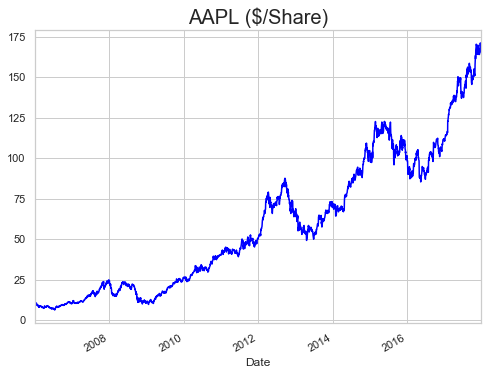

In [25]:
plt.figure(figsize=(8, 6))
aapl.plot(color='blue')
plt.title('AAPL ($/Share)', fontsize=20)

In [26]:
aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2309.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:00:57   Log-Likelihood:                 8319.9
No. Observations:                3019   AIC:                        -1.664e+04
Df Residuals:                    3017   BIC:                        -1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      2.038      0.0

#### Notes
* For more sophisticated MCMC simulation, we use PyMC3, a popular Python library for Bayesian inference.
* We will simulate the posterior probability distributions of alpha and beta from CAPM.  
* We will show how hypothesis testing using a Bayesian approach is straightforward and could be the basis of decision making.
* See https://pymc-devs.github.io/pymc3/getting_started/.

In [27]:
with pm.Model() as model:
    # alpha, beta, and sigma are the hyperparameters over which we have our priors, in this case they are flat priors.    
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta * nasdaq_returns
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=aapl_returns)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = 8,300.9, ||grad|| = 3,115.4: 100%|██████████| 27/27 [00:00<00:00, 765.35it/s]         
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:06<00:00, 462.27draws/s]


<Figure size 720x720 with 0 Axes>

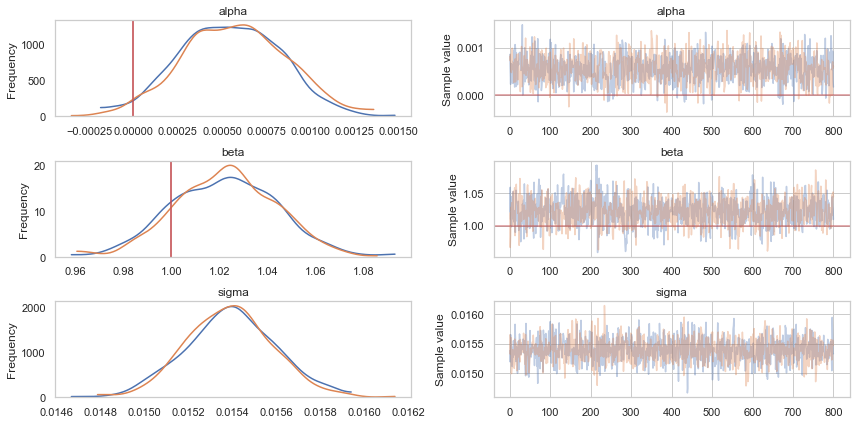

<Figure size 720x720 with 0 Axes>

In [28]:
# Show results after burn in of 200 MCMC replications.

fig = pm.traceplot(trace[199:1000], lines={'alpha': 0, 'beta': 1})
plt.figure(figsize = (10, 10))

#### Notes
* This is the strength of the Bayesian approach.  
* Using transparent prior beliefs, combined with real-world data, we have simulated the posterior distribution functions of two quantities of interest to a data scientist.  
* (You can ignore sigma stuff.)
* Having simulated the entire posterior probability distributions, we can calculate useful metrics.
* Start with averages and 95% credible intervals.
* Note their simularity to the least squares results.

In [29]:
alphamean = np.mean(trace['alpha'][199:1000])
alphap2, alphap97 = np.percentile(trace['alpha'][199:1000], (2.5, 97.5))
betamean = np.mean(trace['beta'][199:1000])
betap2, betap97 = np.percentile(trace['beta'][199:1000], (2.5, 97.5))

print("Average alpha and its 95 percent credible interval are %f %f %f" % (alphamean, alphap2, alphap97))
print("Average beta and its 95 percent credible interval are %f %f %f" % (betamean, betap2, betap97))
print()
print(mod.summary())

Average alpha and its 95 percent credible interval are 0.000544 0.000003 0.001085
Average beta and its 95 percent credible interval are 1.022320 0.980730 1.064959

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2309.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:01:24   Log-Likelihood:                 8319.9
No. Observations:                3019   AIC:                        -1.664e+04
Df Residuals:                    3017   BIC:                        -1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

In [30]:
print ("The probability that alpha is greater than zero is %f" % np.mean(trace['alpha'][199:1000] > 0.0))
print ("The probability that beta is less than one is %f" % np.mean(trace['beta'][199:1000] < 1.0))
print("The joint probability is %f" % np.all([[trace['alpha'][199:1000] > 0.0], [trace['beta'][199:1000] < 1.0]], axis = 0).mean())

The probability that alpha is greater than zero is 0.976280
The probability that beta is less than one is 0.164794
The joint probability is 0.163546


### How Do the Priors Affect the Posteriors?
* Use a different set of prior probabilities.
* Results do not change because in truth the data themselves drive the results.

In [31]:
with pm.Model() as model:
    # alpha, beta, and sigma are the hyperparameters over which we have our priors, in this case they are flat priors.    
    alpha = pm.Uniform('alpha', lower=-1, upper=1)
    beta = pm.Uniform('beta', lower=0, upper=2)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta * nasdaq_returns
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=aapl_returns)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = 8,316.2, ||grad|| = 11.383: 100%|██████████| 25/25 [00:00<00:00, 1205.15it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:07<00:00, 398.08draws/s]


<Figure size 720x720 with 0 Axes>

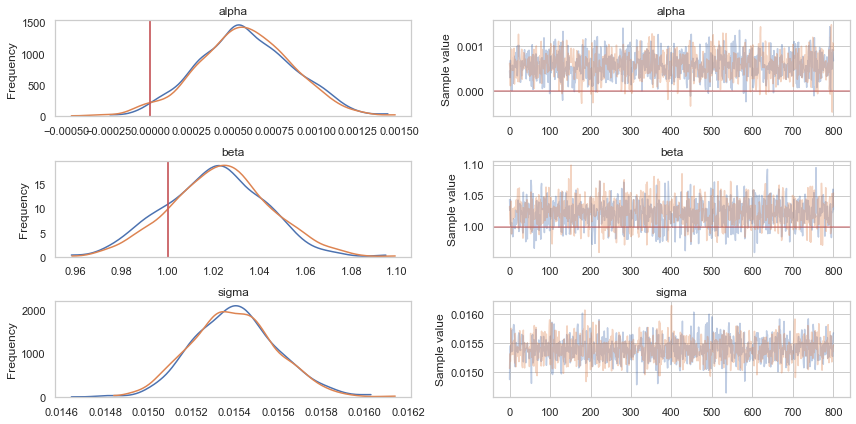

<Figure size 720x720 with 0 Axes>

In [32]:
# Show results after burn in of 200 MCMC replications.

fig = pm.traceplot(trace[199:1000], lines={'alpha': 0, 'beta': 1})
plt.figure(figsize = (10, 10))

In [33]:
print ("The probability that alpha is greater than zero is %f" % np.mean(trace['alpha'][199:1000] > 0.0))
print ("The probability that beta is less than one is %f" % np.mean(trace['beta'][199:1000] < 1.0))
print ("The joint probability is %f" % np.all([[trace['alpha'][199:1000] > 0.0], [trace['beta'][199:1000] < 1.0]], axis = 0).mean())

The probability that alpha is greater than zero is 0.983770
The probability that beta is less than one is 0.179775
The joint probability is 0.177278


### Another Example of PyMC3

In [34]:
griliches = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Griliches.csv")
griliches = griliches.drop(griliches.columns[0], 1)
griliches = griliches[['lw', 'school', 'iq', 'age', 'expr', 'tenure', 'med']]

In [35]:
mod = smf.ols(formula = 'lw ~ school + iq + age + expr + tenure + med', data = griliches).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     lw   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     81.33
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.51e-78
Time:                        12:01:53   Log-Likelihood:                -243.72
No. Observations:                 758   AIC:                             501.4
Df Residuals:                     751   BIC:                             533.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3016      0.122     26.962      0.0

In [36]:
# Create numpy arrays for PyMC3

lw = griliches['lw'].as_matrix()
school = griliches['school'].as_matrix()
iq = griliches['iq'].as_matrix()
age = griliches['age'].as_matrix()
expr = griliches['expr'].as_matrix()
tenure = griliches['tenure'].as_matrix()
med = griliches['med'].as_matrix()

In [37]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta1 = pm.Normal('beta1', mu=0, sd=20)
    beta2 = pm.Normal('beta2', mu=0, sd=20)
    beta3 = pm.Normal('beta3', mu=0, sd=20)
    beta4 = pm.Normal('beta4', mu=0, sd=20)
    beta5 = pm.Normal('beta5', mu=0, sd=20)
    beta6 = pm.Normal('beta6', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta1 * school + beta2 * iq + beta3 * age + beta4 * expr + beta5 * tenure + beta6 * med 
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=lw)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = -273.44, ||grad|| = 2.1271: 100%|██████████| 72/72 [00:00<00:00, 870.32it/s]      
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta6, beta5, beta4, beta3, beta2, beta1, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:40<00:00, 73.43draws/s]


<Figure size 720x720 with 0 Axes>

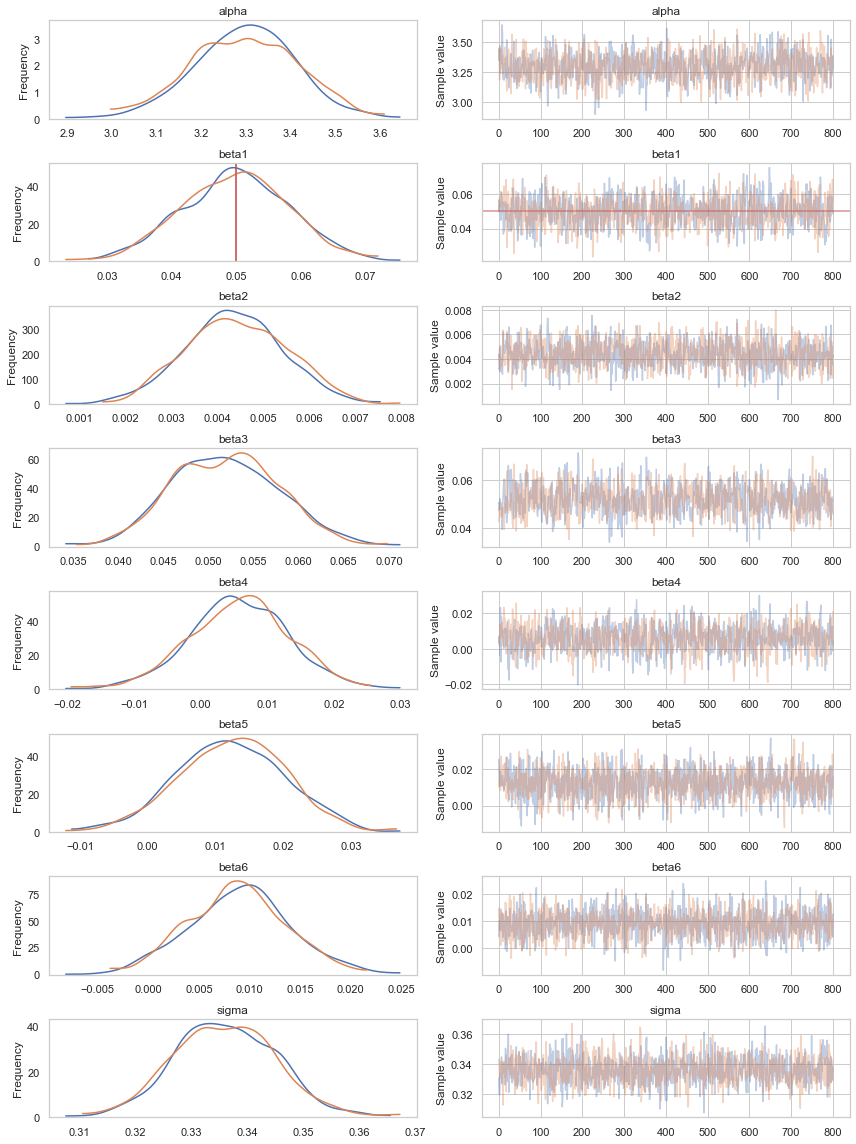

<Figure size 720x720 with 0 Axes>

In [38]:
# Show results after burn in of 200 MCMC replications.

fig = pm.traceplot(trace[199:1000], lines={'beta1': 0.05})
plt.figure(figsize = (10, 10))

In [39]:
print("The probability that returns to schooling exceed 0.05 is %f" % np.mean(trace['beta1'][199:1000] > 0.05))

The probability that returns to schooling exceed 0.05 is 0.500624


In [40]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta1 = pm.Normal('beta1', mu=0.10, sd=1)
    beta2 = pm.Normal('beta2', mu=0, sd=20)
    beta3 = pm.Normal('beta3', mu=0, sd=20)
    beta4 = pm.Normal('beta4', mu=0, sd=20)
    beta5 = pm.Normal('beta5', mu=0, sd=20)
    beta6 = pm.Normal('beta6', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta1 * school + beta2 * iq + beta3 * age + beta4 * expr + beta5 * tenure + beta6 * med 
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=lw)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = -270.45, ||grad|| = 80.773: 100%|██████████| 127/127 [00:00<00:00, 891.72it/s]       
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta6, beta5, beta4, beta3, beta2, beta1, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:41<00:00, 71.94draws/s]


In [41]:
print("The probability that returns to schooling exceed 0.05 is %f" % np.mean(trace['beta1'][199:1000] > 0.05))

The probability that returns to schooling exceed 0.05 is 0.498127


In [42]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta1 = pm.Normal('beta1', mu=0.20, sd=1)
    beta2 = pm.Normal('beta2', mu=0, sd=20)
    beta3 = pm.Normal('beta3', mu=0, sd=20)
    beta4 = pm.Normal('beta4', mu=0, sd=20)
    beta5 = pm.Normal('beta5', mu=0, sd=20)
    beta6 = pm.Normal('beta6', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta1 * school + beta2 * iq + beta3 * age + beta4 * expr + beta5 * tenure + beta6 * med 
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=lw)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = -270.46, ||grad|| = 74.925: 100%|██████████| 113/113 [00:00<00:00, 949.13it/s]         
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta6, beta5, beta4, beta3, beta2, beta1, alpha]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:42<00:00, 70.35draws/s]


In [43]:
print("The probability that returns to schooling exceed 0.06 is %f" % np.mean(trace['beta1'][199:1000] > 0.06))

The probability that returns to schooling exceed 0.06 is 0.098627


## What Is Artificial Intelligence?
* We have done applied statistical learning during this course.
* This is **NOT** AI.
* Key components of AI:
    * Must be include causal models (using Judea Pearl's framework).
    * Must be probabilistic (that is Bayesian).
    * Unsupervised (so probably not Deep Learning).
        * *The Master Algorithm*, Pedro Domingos